In [39]:
import pandas as pd

Data source: [Twitter Sentiment Analysis: Coachella Festival 2015](https://www.kaggle.com/datasets/thedevastator/twitter-sentiment-analysis-coachella-festival)

In [ ]:
data = pd.read_csv('./Coachella-2015-2-DFE.csv')
data

# Data Exploration

In [196]:
data.size

61536

In [42]:
data.columns

Index(['index', 'coachella_sentiment', 'coachella_yn', 'name', 'retweet_count',
       'text', 'tweet_coord', 'tweet_created', 'tweet_id', 'tweet_location',
       'user_timezone'],
      dtype='object')

In [43]:
data['coachella_sentiment'].value_counts()

coachella_sentiment
positive     2283
neutral       928
negative      553
cant tell      82
Name: count, dtype: int64

In [44]:
data[data['coachella_sentiment'] == 'cant tell']['text'].tolist()

['might just cry looking at this line up #Coachella2015 http://t.co/6NYfz6jBo0',
 'Mad S/o to @ChicanoBatman from Plaza De LA Raza to #Coachella2015 the world is your stage, Ahora ay Bailar',
 'Current mood. #Coachella #Coachella2015 #me http://t.co/aJXJmxqzNb',
 'No one understands_Ù÷© #Coachella2015 http://t.co/ZyFw5yinnu',
 'RT @lifelovelana: How I feel about #Coachella2015 this year @Coachella @Drake http://t.co/igCEQb0EUV',
 'Stressed #Coachella2015',
 'Anxiety level ridiculous _Ù÷Õ #Coachella2015',
 'RT @robertosmind: Lil Jon responds to the #Coachella2015 line-up. Pretty funny! @funnyordie http://t.co/yxD6DVyozW',
 "It's looking like Drake might be the Outkast of this year's festival circuit... #Coachella2015 #GovBall2015",
 "Kim Jong Un's reaction to the #Coachella2015  Lineup http://t.co/dFonkohDCZ",
 'RT @laurenonizzle: When I saw Steely Dan and AC/DC on the #Coachella2015 lineup I was like\x89Û_ http://t.co/wamcGhgMoJ',
 "RT @Raury: Who's responsible... _Ù÷â_Ù÷â_Ù÷â #Coachel

entries with `sentiment_label = 'cant tell'` are mostly negative

In [45]:
data[data['coachella_sentiment'] == 'neutral']['text'].tolist()

['\x89ÛÏ@Forever21: The lineup is here! #Coachella2015 http://t.co/NO4XdGRGZq\x89Û\x9d @__AmandaOyola !!!!!!',
 'RT @ParisHilton: What do you guys think of this years #Coachella Lineup? _Ù_¦_Ù___Ù___Ù÷\x9d_ÙÎµ_ÙÎµ_Ù___Ù_¦ #Coachella2015 http://t.co/ru7ViG26aK',
 'RT @ellenwoodEP: so what do you really really think about the lineup for #Coachella2015 ?  50/50? worth going?',
 'åÈ\x89\xa0Õ http://t.co/VXqxLgHPkp 620 Coachella 2015 National Music Editor #Coachella2015 Newfoundland CAN Saint John?s',
 '@coachella tickets purchased. Roll on April #Coachella2015',
 'I see you @MsRebeccaBlack #Coachella2015 http://t.co/wgd6u7rUKs',
 '\x89ÛÏ@NickDevLV: Officially official. #Coachella2015 http://t.co/t1qX0B6QNb\x89Û\x9d lucky you!',
 '\x89\xa0Õ http://t.co/mxCREvIlGP 712 Coachella 2015  Coachella 2015 makes space for rockers and ravers this year #Coachella2015 Ohio USA Columbus',
 "@andrewmcmahon: if @JimHalpert made music.\n\nLMAO I haven't laughed so hard at an article. Well done. #Coachella2

entries with `sentiment_label = 'neutral'` count towards hashtag count but not considered during labelling

In [46]:
data['retweet_count'].value_counts()

retweet_count
0      2915
1       611
2       135
3        52
4        33
5        15
6        11
7         8
8         5
10        5
33        4
9         4
13        3
20        3
175       2
17        2
99        2
66        2
101       2
74        2
72        2
97        2
52        2
48        2
16        2
83        2
11        2
169       1
57        1
98        1
19        1
54        1
71        1
46        1
14        1
22        1
35        1
24        1
68        1
29        1
15        1
260       1
485       1
Name: count, dtype: int64

<Axes: xlabel='retweet_count'>

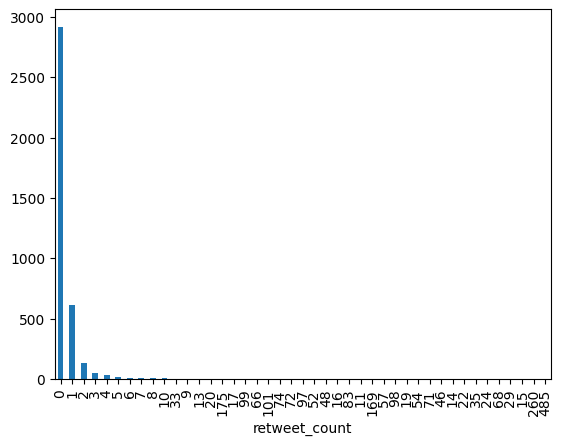

In [47]:
data['retweet_count'].value_counts().plot.bar()

<Axes: xlabel='retweet_count'>

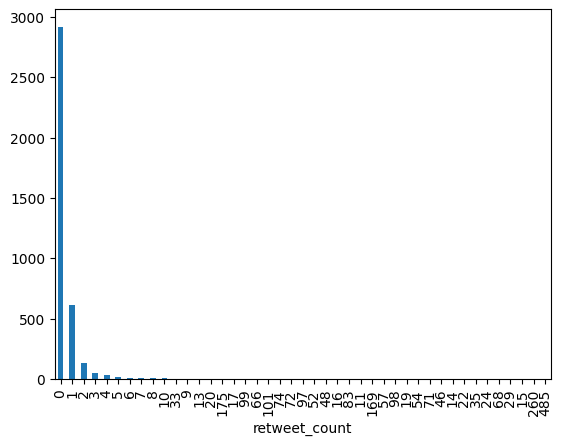

In [48]:
data['retweet_count'].value_counts().plot.bar()

column `retweet_count` is added towards hashtag count

# Extract hashtags from column `text`

In [49]:
data['text'].str.split()

0       [#Coachella2015, tickets, selling, out, in, le...
1       [RT, @sudsybuddy:, WAIT, THIS, IS, ABSOLUTE, F...
2       [#Coachella2015, #VIP, passes, secured!, See, ...
3       [PhillyÛªs, @warondrugsjams, will, play, #Coa...
4       [If, briana, and, her, mom, out, to, #Coachell...
                              ...                        
3841    [Excuse, me, while, I, go, cry, now., _Ù÷¢, #C...
3842    [RT, @touchofallright:, Ride, and, Steely, Dan...
3843    [I've, been, callin, that, since, day, one, #C...
3844    [Is, this, for, real?!?!, #Coachella2015, http...
3845    [RT, @Jen_Baz:, C'monnnnnn, lineup!, #coachell...
Name: text, Length: 3846, dtype: object

In [50]:
data.loc[3]['text']

'Philly\x89Ûªs @warondrugsjams will play #Coachella2015 &amp; #GovBall2015! Watch them on Jimmy Fallon: http://t.co/wzaAE5wYNT http://t.co/sFL9I5sD20'

In [51]:
import re

Extract hashtags via alphanumeric symbols + `#` character

Since some samples have the same hashtag in different cases (`#Coachella2015`, `#coachella2015`), we set all hashtags to lowercase

In [198]:
#data['text'].str.split().apply(lambda x: ['#' in y for y in x])
data['hashtags'] = data['text'].str.split().apply(lambda x: [re.sub('[^a-zA-Z0-9#]', '', elem).lower() for elem in x if '#' in elem])
data

,index,coachella_sentiment,coachella_yn,name,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone,hashtags,relevant_hashtags,coachella_sentiment_int,relevant_hashtags_concat,coachella_sentiment_int_with_retweets
0,0,positive,yes,kokombil,0,#Coachella2015 tickets selling out in less tha...,"[0.0, 0.0]",1/7/15 15:02,5.529630e+17,NaN,Quito,[#coachella2015],[],1,,1
1,1,positive,yes,MisssTaraaa10,2,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...,NaN,1/7/15 15:02,5.529630e+17,united states,NaN,[#coachella2015],[],1,,3
2,2,positive,yes,NMcCracken805,0,#Coachella2015 #VIP passes secured! See you th...,NaN,1/7/15 15:01,5.529630e+17,"Costa Mesa, CA",NaN,"[#coachella2015, #vip]",[],1,,1
3,3,positive,yes,wxpnfm,1,PhillyÛªs @warondrugsjams will play #Coachell...,NaN,1/7/15 15:01,5.529630e+17,"Philadelphia, PA and Worldwide",Quito,"[#coachella2015, #govball2015]",[],1,,2
4,4,positive,yes,Caesears,0,If briana and her mom out to #Coachella2015 i...,NaN,1/7/15 15:00,5.529630e+17,NaN,NaN,[#coachella2015],[],1,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,3841,cant tell,yes,MissXOverdose,0,Excuse me while I go cry now. _Ù÷¢ #Coachella2...,NaN,1/6/15 10:32,5.525330e+17,atx,Pacific Time (US & Canada),[#coachella2015],[],NaN,,NaN
3842,3842,cant tell,yes,NedRaggett,1,RT @touchofallright: Ride and Steely Dan. It w...,NaN,1/6/15 10:28,5.525320e+17,"Costa Mesa, CA",Pacific Time (US & Canada),[#coachella2015],[],NaN,,NaN
3843,3843,cant tell,yes,nicolejackieee,0,I've been callin that since day one #Coachella...,NaN,1/6/15 10:26,5.525320e+17,NaN,NaN,[#coachella2015],[],NaN,,NaN
3844,3844,cant tell,yes,NiqueWobbitz,2,Is this for real?!?! #Coachella2015 http://t.c...,NaN,1/6/15 10:21,5.525300e+17,Huntington Beach X Long Beach,Pacific Time (US & Canada),[#coachella2015],[],NaN,,NaN


In [204]:
data['log'] = ['tweet_created', 'name', 'text']

AttributeError: 'DataFrame' object has no attribute 'tolist'

In [223]:
data['hashtags'].explode()

0       #coachella2015
1       #coachella2015
2       #coachella2015
2                 #vip
3       #coachella2015
             ...      
3842    #coachella2015
3843    #coachella2015
3844    #coachella2015
3845    #coachella2015
3845        #impatient
Name: hashtags, Length: 5493, dtype: object

In [53]:
data['hashtags'].value_counts()

hashtags
[#coachella2015]                        2753
[#coachella, #coachella2015]              94
[#coachella2015, #coachella]              49
[#coachella2015, #coachellalineup]        26
[#storify, #coachella2015]                12
                                        ... 
[#music, #rockon, #coachella2015]          1
[#legends, #coachella2015]                 1
[#coachella2015, #dashradio]               1
[#takemetothedesert, #coachella2015]       1
[#coachella2015, #lulz]                    1
Name: count, Length: 766, dtype: int64

Since each tweet can contain more than one hashtag, we explode the hashtags list and analyze each hashtag

In [54]:
hashtags_list = data['hashtags'].explode()
hashtags_list.value_counts()

hashtags
#coachella2015      3806
#coachella           287
#coachellalineup      66
#drake                39
#acdc                 35
                    ... 
#igottago              1
#iwillgo               1
#coachella2015i        1
#imyosugarbaby         1
#lulz                  1
Name: count, Length: 859, dtype: int64

Analyze hashtags containing `coachella`, as well as analyze the complement set

In [55]:
hashtags_coachella_list = hashtags_list[hashtags_list.str.startswith('#coachella') == True]
hashtags_coachella_list.value_counts()

hashtags
#coachella2015                   3806
#coachella                        287
#coachellalineup                   66
#coachellatickets                  15
#coachellafest                      3
#coachella2015congrats              2
#coachellaprobs                     2
#coachella15                        2
#coachellaorbust                    2
#coachella20                        2
#coachellaonfleek                   2
#coachella2015s                     2
#coachellaneedscalvin               1
#coachellafestival                  1
#coachellapredictions               1
#coachellatickets4sale              1
#coachellas                         1
#coachellafashion                   1
#coachellafail                      1
#coachellaselfies                   1
#coachellalineupsucks               1
#coachella2013lineup                1
#coachella2015coolguyniceflow       1
#coachellavalleymusicfestival       1
#coachellaforsale                   1
#coachellatravelpackage             1
#co

In [56]:
hashtags_no_coachella_list = hashtags_list[hashtags_list.str.startswith('#coachella') == False]
hashtags_no_coachella_list.value_counts()

hashtags
#drake                   39
#acdc                    35
#music                   28
#jackwhite               23
#lineup                  18
                         ..
#haters                   1
#dreamingofthedesert      1
#xofam                    1
perfect#coachella2015     1
#lulz                     1
Name: count, Length: 823, dtype: int64

<Axes: xlabel='hashtags'>

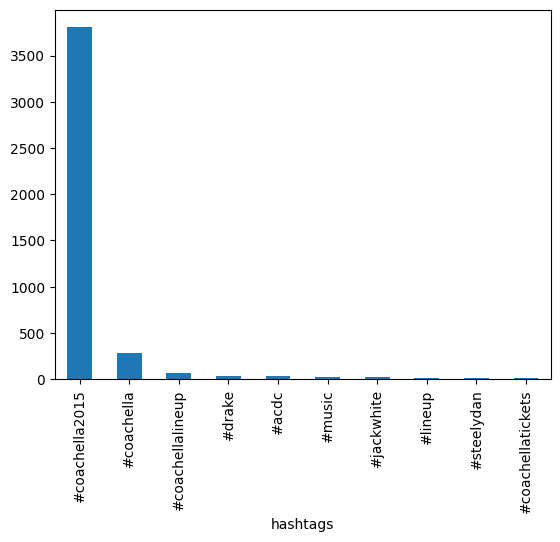

In [57]:
hashtags_list.value_counts()[:10].plot.bar()

We assume that tweets containing hashtags `coachella2015` or `coachella` can be considered "base hashtags". We filter these out for hashtag analysis, but we still keep the tweets for text analysis later

In [74]:
hashtags_no_coachella_list

2                    #vip
3            #govball2015
5                   #west
5                   #coas
8                  #truth
              ...        
3820             #ratatat
3823             #finally
3824    #mycoachellaqueen
3837                #lulz
3845           #impatient
Name: hashtags, Length: 1272, dtype: object

In [58]:
hashtags_no_coachella2015_list = hashtags_list[~(hashtags_list.isin(['#coachella2015', '#coachella']))].str.replace('coachella','')
hashtags_no_coachella2015_list

2               #vip
3       #govball2015
5              #west
5              #coas
8             #truth
            ...     
3824        #myqueen
3826         #lineup
3837           #lulz
3839         #lineup
3845      #impatient
Name: hashtags, Length: 1400, dtype: object

In [ ]:
data[]

In [59]:
data['hashtags']

0                     [#coachella2015]
1                     [#coachella2015]
2               [#coachella2015, #vip]
3       [#coachella2015, #govball2015]
4                     [#coachella2015]
                     ...              
3841                  [#coachella2015]
3842                  [#coachella2015]
3843                  [#coachella2015]
3844                  [#coachella2015]
3845      [#coachella2015, #impatient]
Name: hashtags, Length: 3846, dtype: object

Since all entries have `coachella_yn = True`, this column does not contribute any new information

In [60]:
data['coachella_yn'].value_counts()

coachella_yn
yes    3846
Name: count, dtype: int64

There exist some tweets in the form:

`'#NowPlaying Decomposing\nAndrea Oliva \x89Û¢ Decomposing EP on #Spotify #coachella2015 http://t.co/RD10j0SWUy',`

We analyze tweets containing `#NowPlaying` to see if they are created by organizer

In [61]:
indices_with_nowplaying = data['hashtags'].apply(lambda x: [elem for elem in x if elem == '#nowplaying'])
indices_with_nowplaying = indices_with_nowplaying[indices_with_nowplaying.apply(lambda x: '#nowplaying' in x)].index
data.loc[indices_with_nowplaying]

,index,coachella_sentiment,coachella_yn,name,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone,hashtags
328,328,positive,yes,fab3rd,0,@Kiesza Can't wait to see you this year at 201...,NaN,1/7/15 10:13,5.528910e+17,"Houston,TX",Central Time (US & Canada),"[#nowplaying, #coachella2015]"
373,373,positive,yes,Mark_Attew,0,#NowPlaying Boys Latin\nPanda Bear Û¢ Boys La...,NaN,1/7/15 8:33,5.528660e+17,"Pasadena, CA",Pacific Time (US & Canada),"[#nowplaying, #spotify, #coachella2015]"
601,601,positive,yes,RedEyeFlight5,0,#nowplaying @djsnake with visions of little #p...,NaN,1/6/15 21:51,5.527040e+17,P-Town Cali!,Pacific Time (US & Canada),"[#nowplaying, #palmtrees, #coachella2015]"
1039,1039,positive,yes,sexxystephy,0,#nowplaying the official #coachella2015 playli...,"[33.49450223, -111.98688103]",1/6/15 15:15,5.526040e+17,Scottsdale,Pacific Time (US & Canada),"[#nowplaying, #coachella2015]"
1197,1197,positive,yes,HannahY,0,#coachella2015 playlist! ªÇ COACHELLA 2015 ...,NaN,1/6/15 14:09,5.525880e+17,"ÌÏT: 38.894388,-77.018897",Eastern Time (US & Canada),"[#coachella2015, #nowplaying]"
2293,2293,neutral,yes,Mark_Attew,0,#NowPlaying Hollywood Forever Cemetery Sings\n...,NaN,1/7/15 14:33,5.529560e+17,"Pasadena, CA",Pacific Time (US & Canada),"[#nowplaying, #spotify, #coachella2015]"
2301,2301,neutral,yes,Mark_Attew,0,#NowPlaying Decomposing\nAndrea Oliva Û¢ Deco...,NaN,1/7/15 14:03,5.529490e+17,"Pasadena, CA",Pacific Time (US & Canada),"[#nowplaying, #spotify, #coachella2015]"
2443,2443,neutral,yes,Mark_Attew,0,#NowPlaying Divinity - filous Remix\nPorter Ro...,NaN,1/7/15 9:05,5.528740e+17,"Pasadena, CA",Pacific Time (US & Canada),"[#nowplaying, #coachella2015]"
2451,2451,neutral,yes,Mark_Attew,0,#NowPlaying I Follow Rivers - The Magician Rem...,NaN,1/7/15 8:41,5.528680e+17,"Pasadena, CA",Pacific Time (US & Canada),"[#nowplaying, #coachella2015]"
2629,2629,neutral,yes,SkerdiOfficial,0,It's freezing balls in #milwaukee tonight. Sta...,NaN,1/6/15 18:21,5.526510e+17,Milwaukee USA - Woldwide,Eastern Time (US & Canada),"[#milwaukee, #edm, #nowplaying, #coachella2015..."


In [68]:
data.loc[indices_with_nowplaying][['name', 'hashtags']]

,name,hashtags
328,fab3rd,"[#nowplaying, #coachella2015]"
373,Mark_Attew,"[#nowplaying, #spotify, #coachella2015]"
601,RedEyeFlight5,"[#nowplaying, #palmtrees, #coachella2015]"
1039,sexxystephy,"[#nowplaying, #coachella2015]"
1197,HannahY,"[#coachella2015, #nowplaying]"
2293,Mark_Attew,"[#nowplaying, #spotify, #coachella2015]"
2301,Mark_Attew,"[#nowplaying, #spotify, #coachella2015]"
2443,Mark_Attew,"[#nowplaying, #coachella2015]"
2451,Mark_Attew,"[#nowplaying, #coachella2015]"
2629,SkerdiOfficial,"[#milwaukee, #edm, #nowplaying, #coachella2015..."


Only 5 out of 11 tweets are by Mark_Attew

Analyze account names of tweets to see if some accounts (e.g. influencers) have higher impact on the data

This, however, is not the case, as the account with the highest tweets has 19 tweets

In [62]:
data['name'].value_counts()


name
mitchmarzuola     19
LANGMarMendoza    14
brownjenjen       12
AKOD              10
vanessafranko      9
                  ..
isitlow10049       1
StephenUssher      1
Latifaya           1
shannonbugelli     1
LindsayRuben       1
Name: count, Length: 3530, dtype: int64

In [63]:
# indices_with_nowplaying[len(indices_with_nowplaying) > 0]

In [64]:
hashtags_no_coachella2015_list[hashtags_no_coachella2015_list == '#nowplaying']

328     #nowplaying
373     #nowplaying
601     #nowplaying
1039    #nowplaying
1197    #nowplaying
2293    #nowplaying
2301    #nowplaying
2443    #nowplaying
2451    #nowplaying
2629    #nowplaying
3777    #nowplaying
Name: hashtags, dtype: object

Index([   2,    3,    5,    5,    8,    8,   12,   18,   23,   24,
       ...
       3806, 3814, 3817, 3820, 3823, 3824, 3826, 3837, 3839, 3845],
      dtype='int64', length=1400)

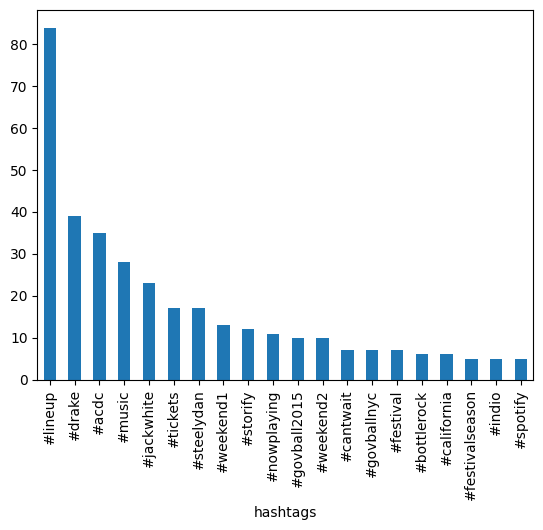

In [209]:
hashtags_no_coachella2015_list.value_counts()[:20].plot.bar()

In [216]:
hashtags_no_coachella2015_list

2               #vip
3       #govball2015
5              #west
5              #coas
8             #truth
            ...     
3824        #myqueen
3826         #lineup
3837           #lulz
3839         #lineup
3845      #impatient
Name: hashtags, Length: 1400, dtype: object

In [221]:
data_no_coachella2015 = data.loc[hashtags_no_coachella2015_list.index]
data_no_coachella2015[['retweet_count', 'h']]

,index,coachella_sentiment,coachella_yn,name,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone,hashtags,relevant_hashtags,coachella_sentiment_int,relevant_hashtags_concat,coachella_sentiment_int_with_retweets
2,2,positive,yes,NMcCracken805,0,#Coachella2015 #VIP passes secured! See you th...,NaN,1/7/15 15:01,5.529630e+17,"Costa Mesa, CA",NaN,"[#coachella2015, #vip]",[],1,,1
3,3,positive,yes,wxpnfm,1,PhillyÛªs @warondrugsjams will play #Coachell...,NaN,1/7/15 15:01,5.529630e+17,"Philadelphia, PA and Worldwide",Quito,"[#coachella2015, #govball2015]",[],1,,2
5,5,positive,yes,donbosco_6,0,West side is the best side!\n#west #coas #Coac...,NaN,1/7/15 14:58,5.529630e+17,Cuenca Ecuador,Eastern Time (US & Canada),"[#west, #coas, #coachella2015]",[],1,,1
5,5,positive,yes,donbosco_6,0,West side is the best side!\n#west #coas #Coac...,NaN,1/7/15 14:58,5.529630e+17,Cuenca Ecuador,Eastern Time (US & Canada),"[#west, #coas, #coachella2015]",[],1,,1
8,8,positive,yes,Ben_BigB_Davies,0,If someone got me to Coachella if be your frie...,NaN,1/7/15 14:54,5.529620e+17,The mighty bridgend !,NaN,"[#truth, #desprate, #coachella2015, #coachella]",[],1,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3824,3824,cant tell,yes,danicatiru_,0,i wonder what will @vanessahudgens looks like ...,NaN,1/6/15 11:37,5.525500e+17,subic Û¢ mla,Beijing,"[#coachella2015, #mycoachellaqueen]",[],NaN,,NaN
3826,3826,cant tell,yes,charley_feldman,0,Aw! They let Cool Dad make the #Coachella line...,NaN,1/6/15 11:27,5.525470e+17,"Los Angeles, CA",Pacific Time (US & Canada),"[#coachella, #coachella2015, #coachellalineup]",[#lineup],NaN,#lineup,NaN
3837,3837,cant tell,yes,clarejens,0,Drake #Coachella2015 #lulz,NaN,1/6/15 10:45,5.525370e+17,"Los Angeles, CA",Mountain Time (US & Canada),"[#coachella2015, #lulz]",[],NaN,,NaN
3839,3839,cant tell,yes,Legendgirly,0,#Coachella2015 #coachellalineup is gonna knock...,NaN,1/6/15 10:34,5.525340e+17,In the Wind,Pacific Time (US & Canada),"[#coachella2015, #coachellalineup]",[#lineup],NaN,#lineup,NaN


## Extract relevant hashtags

### Ansatz 1

In [226]:
relevant_hashtags = hashtags_no_coachella2015_list.value_counts()[hashtags_no_coachella2015_list.value_counts() > 10].keys()
relevant_hashtags

Index(['#lineup', '#drake', '#acdc', '#music', '#jackwhite', '#tickets',
       '#steelydan', '#weekend1', '#storify', '#nowplaying'],
      dtype='object', name='hashtags')

In [83]:
#data['relevant_hashtags'] = data['hashtags'].apply(lambda x: [elem.replace('coachella','') for elem in x if elem in relevant_hashtags])

data['relevant_hashtags'] = data['hashtags'].apply(lambda x: [elem.replace('coachella','') for elem in x if elem.replace('coachella','') in relevant_hashtags])

data['relevant_hashtags'].value_counts()

relevant_hashtags
[]                                         3605
[#lineup]                                    75
[#drake]                                     25
[#music]                                     22
[#tickets]                                   17
[#acdc]                                      16
[#jackwhite]                                 13
[#steelydan]                                 12
[#storify]                                   12
[#nowplaying]                                11
[#weekend1]                                   9
[#acdc, #music]                               3
[#drake, #acdc]                               2
[#jackwhite, #lineup]                         2
[#lineup, #lineup]                            2
[#steelydan, #acdc]                           2
[#music, #drake]                              1
[#lineup, #drake]                             1
[#jackwhite, #acdc, #drake, #steelydan]       1
[#weekend1, #weekend1]                        1
[#drake, #acdc, #jackw

In [84]:
data['relevant_hashtags'].explode().value_counts()

relevant_hashtags
#lineup        84
#drake         39
#acdc          35
#music         28
#jackwhite     23
#tickets       17
#steelydan     17
#weekend1      13
#storify       12
#nowplaying    11
Name: count, dtype: int64

Analyze `coachella_sentiment` for each relevant_hashtag

In [89]:
map_sentiment = {
    'positive' : 1,
    'neutral' : 0,
    'negative' : -1,
    'cant tell' : pd.NA

}

data['coachella_sentiment_int'] = data['coachella_sentiment'].map(map_sentiment)

data

,index,coachella_sentiment,coachella_yn,name,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone,hashtags,relevant_hashtags,coachella_sentiment_int
0,0,positive,yes,kokombil,0,#Coachella2015 tickets selling out in less tha...,"[0.0, 0.0]",1/7/15 15:02,5.529630e+17,NaN,Quito,[#coachella2015],[],1
1,1,positive,yes,MisssTaraaa10,2,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...,NaN,1/7/15 15:02,5.529630e+17,united states,NaN,[#coachella2015],[],1
2,2,positive,yes,NMcCracken805,0,#Coachella2015 #VIP passes secured! See you th...,NaN,1/7/15 15:01,5.529630e+17,"Costa Mesa, CA",NaN,"[#coachella2015, #vip]",[],1
3,3,positive,yes,wxpnfm,1,PhillyÛªs @warondrugsjams will play #Coachell...,NaN,1/7/15 15:01,5.529630e+17,"Philadelphia, PA and Worldwide",Quito,"[#coachella2015, #govball2015]",[],1
4,4,positive,yes,Caesears,0,If briana and her mom out to #Coachella2015 i...,NaN,1/7/15 15:00,5.529630e+17,NaN,NaN,[#coachella2015],[],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,3841,cant tell,yes,MissXOverdose,0,Excuse me while I go cry now. _Ù÷¢ #Coachella2...,NaN,1/6/15 10:32,5.525330e+17,atx,Pacific Time (US & Canada),[#coachella2015],[],NaN
3842,3842,cant tell,yes,NedRaggett,1,RT @touchofallright: Ride and Steely Dan. It w...,NaN,1/6/15 10:28,5.525320e+17,"Costa Mesa, CA",Pacific Time (US & Canada),[#coachella2015],[],NaN
3843,3843,cant tell,yes,nicolejackieee,0,I've been callin that since day one #Coachella...,NaN,1/6/15 10:26,5.525320e+17,NaN,NaN,[#coachella2015],[],NaN
3844,3844,cant tell,yes,NiqueWobbitz,2,Is this for real?!?! #Coachella2015 http://t.c...,NaN,1/6/15 10:21,5.525300e+17,Huntington Beach X Long Beach,Pacific Time (US & Canada),[#coachella2015],[],NaN


In [141]:
mask1 = data['relevant_hashtags'].str.len() > 0

data[mask1]['hashtags']

[['#coachella', '#coachella2015', '#coachellatickets'],
 ['#coachella', '#coachella2015', '#coachellatickets'],
 ['#coachella', '#coachella2015', '#coachellatickets'],
 ['#coachella2015', '#music'],
 ['#storify', '#coachella2015'],
 ['#coachella', '#coachella2015', '#coachellatickets'],
 ['#coachellatickets', '#coachella2015'],
 ['#coachella2015', '#drake', '#need'],
 ['#coachella',
  '#coachella2015',
  '#weekend1',
  '#coachellaweekend1',
  '#hashtagoverload'],
 ['#coachella2015', '#weekend1'],
 ['#coachella2015', '#weekend1'],
 ['#coachella',
  '#coachella2015',
  '#cantwait',
  '#gaallday',
  '#weekend1',
  '#weekend2'],
 ['#coachella', '#coachella2015', '#weekend1', '#tameimpala', '#feelsli'],
 ['#acdc', '#coachella2015'],
 ['#bdaymonth', '#april', '#weekend1', '#coachella2015'],
 ['#coachella2015', '#jackwhite'],
 ['#nowplaying', '#coachella2015'],
 ['#music', '#coachella2015'],
 ['#musicfestival',
  '#coachella2015',
  '#altj',
  '#drake',
  '#tamaimpala',
  '#amazing',
  '#line

In [168]:
data['relevant_hashtags_concat'] = data['relevant_hashtags'].apply(lambda x: ''.join(x))
data.groupby('relevant_hashtags_concat').agg({'coachella_sentiment_int': "sum"}).sort_values('coachella_sentiment_int', ascending=False)

,coachella_sentiment_int
relevant_hashtags_concat,
,1643
#lineup,25
#music,15
#weekend1,8
#drake,8
#acdc,7
#nowplaying,5
#jackwhite,5
#tickets,2


In [121]:
data[mask1].groupby('relevant_hashtags').agg({'coachella_sentiment_int': "sum"})

TypeError: unhashable type: 'list'

In [240]:


for hashtag in relevant_hashtags:
        maskLoop = data.relevant_hashtags.apply(lambda x: hashtag in x)
        tempData = data[maskLoop]
        print(hashtag)
        print(tempData['coachella_sentiment_int'].value_counts(dropna=False))
        tempData('')
        print(len(tempData))
        print(tempData['coachella_sentiment_int'].sum()/len(tempData))
        print('\n')


#lineup
coachella_sentiment_int
1       43
0       24
-1      13
<NA>     2
Name: count, dtype: int64


TypeError: 'DataFrame' object is not callable

Factoring `retweet_count` into `coachella_sentiment_int`

In [ ]:
data['retweet_count'].min(), data['retweet_count'].max()

In [ ]:
data['coachella_sentiment_int_with_retweets'] = (1 + data['retweet_count']) * data['coachella_sentiment_int']
data['coachella_sentiment_int_with_retweets'].min(), data['coachella_sentiment_int_with_retweets'].max()

In [195]:
data['coachella_sentiment_int_with_retweets'].value_counts().sort_index(ascending=False)

coachella_sentiment_int_with_retweets
261       1
176       1
102       1
84        1
73        1
69        1
55        1
47        1
36        1
34        1
30        1
25        1
23        1
21        2
18        1
17        2
16        1
15        1
14        3
11        2
10        2
9         4
8         4
7         4
6         7
5        21
4        28
3        81
2       358
1      1749
0       928
-1      435
-2       83
-3       15
-4        9
-5        4
-6        3
-7        1
-8        3
Name: count, dtype: int64

### Ansatz 2

In [ ]:
hashtags_per_retweet_count = pd.concat([hashtags_no_coachella2015_list, (data.loc[hashtags_no_coachella2015_list.index]["retweet_count"] + 1)], axis=1)
hashtags_per_retweet_count

,hashtags,retweet_count
2,#vip,1
3,#govball2015,2
5,#west,1
5,#coas,1
8,#truth,1
...,...,...
3824,#myqueen,1
3826,#lineup,1
3837,#lulz,1
3839,#lineup,1


In [ ]:
hashtags_per_retweet_count.groupby('hashtags')['retweet_count'].sum().sort_values(ascending=False)[:50]

hashtags
#lineup             118
#tickets             66
#jackwhite           55
#drake               53
#music               46
#acdc                39
#epic                38
#isthisreallife      23
#steelydan           21
#storify             19
#lineup#djneon       16
#govball2015         15
#co                  14
#edm                 14
#weekend1            13
#talkback            13
#coa                 13
#20                  13
#texas               12
#govballnyc          12
#coachell            12
#week2               12
#nowplaying          11
#weekend2            11
#drizzy              11
#yuma                10
#runthejewels        10
#untz                10
#rt                  10
#warpedtour          10
#oldschool            9
#rap                  9
#hiphop               9
#2015                 9
#bottlerock           9
#crypto               9
#hilarious            9
#festival             9
#worstlineupever      8
#soyraka              8
#musicfestivals       8
#festiv